## Preprocessing

In [145]:
# importing pandas so that dataset can then be read into pandas dataframe:

In [146]:
import pandas as pd

In [147]:
# reading the dataset into a pandas dataframe:

In [148]:
df = pd.read_csv('adult.data')

In [149]:
# getting a quick look at a few columns of the dataframe:

In [150]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [151]:
# Renaming the columns so that their names are more descriptive and clear:
df.columns = ['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income']

In [152]:
# seeing the change after renaming columns:

In [153]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [154]:
# importing the train_test_split function from the appropriate library:
from sklearn.model_selection import train_test_split

# creating X and y
y = df.income
X = df.drop(columns='income')
X = pd.get_dummies(X)

# using the train_test_split function to create a training dataset consisting of X_train and y_train and a 
# testing dataset that is 20 percent of the total data and consists of X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [155]:
#scale data
from sklearn import preprocessing
import numpy as np
# create scaler based on training data and apply it to scale both X_train and X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Modeling

In [156]:
# importing libraries to model the data, generate scores for how well the modeling performed, and visualize results:

In [157]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [158]:
# Logistic Regression

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
# Creating a parameter grid containing logistic regression parameters to be used in GridSearchCV:

In [162]:
param_grid = {'C': range(1,10,2)}

In [163]:
# Instantiating the model:

In [164]:
lr = LogisticRegression()

In [165]:
# Grid Search:

In [166]:
clf = GridSearchCV(lr, param_grid)

In [167]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(), param_grid={'C': range(1, 10, 2)})

In [168]:
clf.best_params_

{'C': 1}

In [169]:
grid_predictions = clf.predict(X_test)

In [170]:
# Printing different scores (classification report) in order to judge the model's strength:

In [171]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4990
        >50K       0.73      0.26      0.39      1522

    accuracy                           0.80      6512
   macro avg       0.77      0.62      0.64      6512
weighted avg       0.79      0.80      0.77      6512



In [172]:
# Showing a confusion matrix to further evaluate the model's strength:

In [173]:
confusion_matrix(y_test,grid_predictions)

array([[4839,  151],
       [1120,  402]])

In [174]:
# Printing the accuracy score of the model:

In [175]:
lr_ac = accuracy_score(y_test,grid_predictions)
print(lr_ac)

0.8048218673218673


In [176]:
# Decision Tree

In [177]:
from sklearn import tree

In [178]:
# Creating a parameter grid, instantiating the model, using GridSearchCV:

In [179]:
param_grid2 = {'criterion': ['gini','entropy'], 'splitter': ['best','random'], 'max_depth': [3,5,7,10,20]}

In [180]:
dt = tree.DecisionTreeClassifier()

In [181]:
clf2 = GridSearchCV(dt, param_grid2)

In [182]:
clf2.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 20],
                         'splitter': ['best', 'random']})

In [183]:
clf2.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [184]:
grid_predictions2 = clf2.predict(X_test)

In [185]:
# Generating scores and confusion matrix:

In [186]:
print(classification_report(y_test,grid_predictions2))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4990
        >50K       0.76      0.56      0.64      1522

    accuracy                           0.86      6512
   macro avg       0.82      0.75      0.78      6512
weighted avg       0.85      0.86      0.85      6512



In [187]:
confusion_matrix(y_test,grid_predictions2)

array([[4727,  263],
       [ 673,  849]])

In [188]:
dt_ac = accuracy_score(y_test,grid_predictions2)
print(dt_ac)

0.8562653562653563


In [189]:
# Random Forest Classifier-following same steps with GridSearchCV, instantiating model, and printing confusion matrix
# and scores as did with other models:

In [190]:
param_grid3 = {'n_estimators': [60,100,200,300],'criterion':['gini','entropy'],'max_depth': [3,10]}

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [192]:
clf3 = GridSearchCV(rf, param_grid3)

In [193]:
clf3.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 10],
                         'n_estimators': [60, 100, 200, 300]})

In [194]:
clf3.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [195]:
grid_predictions3 = clf3.predict(X_test)

In [196]:
print(classification_report(y_test,grid_predictions3))

              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      4990
        >50K       0.79      0.54      0.64      1522

    accuracy                           0.86      6512
   macro avg       0.83      0.75      0.78      6512
weighted avg       0.85      0.86      0.85      6512



In [197]:
confusion_matrix(y_test,grid_predictions3)

array([[4774,  216],
       [ 705,  817]])

In [198]:
rf_ac = accuracy_score(y_test,grid_predictions3)
print(rf_ac)

0.8585687960687961


In [199]:
# Gradient Boost-following same steps with GridSearchCV, instantiating model, and printing confusion matrix
# and scores as did with other models:

In [200]:
param_grid4 = {'learning_rate':[0.01,0.1,1],'n_estimators':[50,100]}

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [202]:
clf4 = GridSearchCV(gb,param_grid4)

In [203]:
clf4.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]})

In [204]:
clf4.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [205]:
grid_predictions4 = clf4.predict(X_test)

In [206]:
print(classification_report(y_test,grid_predictions4))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4990
        >50K       0.78      0.59      0.67      1522

    accuracy                           0.86      6512
   macro avg       0.83      0.77      0.79      6512
weighted avg       0.86      0.86      0.86      6512



In [207]:
confusion_matrix(y_test, grid_predictions4)

array([[4730,  260],
       [ 622,  900]])

In [208]:
gb_ac = accuracy_score(y_test,grid_predictions4)
print(gb_ac)

0.8645577395577395


## Variable Importance Visualization

In [209]:
# As described in the summary below, decision tree was chosen to be the best model. To reveal more information about
# the behind the scenes workings of the model, the relative variable importances for the decision tree model are 
# displayed below:

30


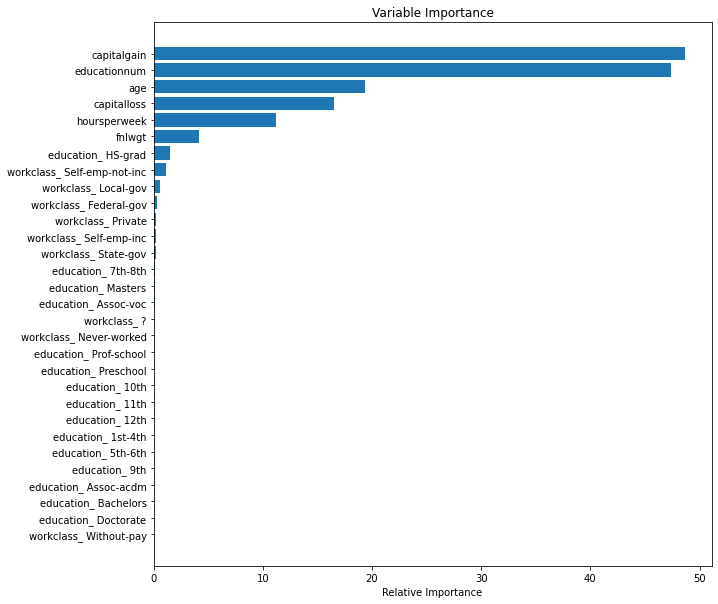

In [210]:
# creating a plot showing the importance of different variables for the prediction:
feature_importance = clf2.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Summary

In this modeling section (jupyter notebook) of capstone two, the preprocessing steps were included at the beginning of the jupyter notebook in order to get the dataset loaded and in good shape (e.g. necessary dummy variables created) to be analyzed. Then, several necessary libraries/modules were imported. Then, four different models (arranged in the notebook in rough order of complexity) were created and fitted to the data. GridSearchCV was used with all four of these models in an attempt to find the best parameters for each of the models. Two relatively simple models were used-logistic regression and decision tree. Also, two more complex ensemble models were used-random forest classifier and gradient boosting classifier. 

After each model was created, fitted, and its hyperparameters (roughly) optimized via GridSearchCV, scores were printed showing the performance of the model.

Lastly, a figure showing the relative importance of different explanatory variables in the highest performing (most accurate) model was printed. 

The model accuracies were as follows (rounded to three decimal places):
Logistic Regression: 0.805
Decision Tree: 0.856
Random Forest Classifier: 0.859
Gradient Boosting Classifier: 0.865

It can be seen that Logistic Regression has noticeably lower accuracy than the other three models, but the other three models have extremely similar accuracy scores that only differ by less than 0.01. To get a full picture of a models performance, more than just an accuracy score must be examined. This is why I printed a full classification report and confusion matrix for each model. Choosing the best model may take into account multiple scores from the classification report as well as the runtime, complexity, and computational load associated with the model. The precision scores for each model for the class “earns >50K” and the class “earns <=50K” may also be relevant. If a certain business problem demands that a model have correct labeling for a very high percentage of a certain class, then looking at each model’s precision score for each class can be used to further distinguish which model should be used.


The three models of decision tree, random forest and gradient boost all have amazingly similar precision, recall and f1-scores across the board (incl. for both classes of >50K and <=50K), which makes them very hard to distinguish. Thus, because these three models all score so similarly across multiple different scoring methods, I think it is best to pick the decision tree. Occam’s Razor says always pick the most simple solution, and the decision tree is also likely less computationally expensive to run again than random forest or gradient boost. Lastly, decision tree is the easiest to understand intuitively out of those three models. Thus, based on work done so far, I would choose the decision tree model to implement in a business context.


